# "[속보]", 10월1일~11월15일, 매일 100개, 관련도순, 상위100개 기사

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

### 테스트

In [ ]:
# 한글 인코딩
import urllib.parse

text = "[속보]"

# URL 인코딩
encoded_text = urllib.parse.quote(text)

year = "2024"
month = "10"
start_d = "1"
end_d = "31"


# 정렬 옵션 sort=0 : 관련도순    sort=1 : 최신순    sort=2 : 오래된순             # 언론사 옵션 mynews=0 : 전체    mynews=1 : 일간지
# 오래된순 정렬, 일간지 언론사
# url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=2&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=1&office_type=3&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=1&service_area=0"
# 관련도순 정렬, 전체 언론사
url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"


print(url)


# 웹사이트 열기
driver.get(url)

https://search.naver.com/search.naver?where=news&query=%5B%EC%86%8D%EB%B3%B4%5D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2024.02.15&de=2024.02.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20240215to20240231&is_sug_officeid=0&office_category=0&service_area=0


### 최종 월별 크롤링 코드

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import urllib.parse
import time
import pandas as pd

# 데이터프레임 리스트 초기화
all_data = []


#####################################################
# 검색어, 연도, 월 설정
text = "[속보]"
year = ['2024']
month = ['10']
#####################################################

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

# 연도, 월을 순회하며 크롤링
for y in year:
    for m in month:
        # 월의 마지막 날짜 계산
        if m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12':
            last_day = 31
        elif m == '04' or m == '06' or m == '09' or m == '11':
            last_day = 30
        else:  # 2월 (윤년은 29일)
            last_day = 29

        # 하루 단위로 크롤링
        for day in range(24, last_day + 1):
            start_d = str(day).zfill(2)  # 01, 02, ..., 31 형태로 만들어줌
            end_d = start_d  # 하루 단위로 크롤링하므로 시작일과 종료일이 같음

            # URL 생성
            encoded_text = urllib.parse.quote(text)  # 검색어를 url 인코딩
            url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={y}.{m}.{start_d}&de={y}.{m}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{y}{m}{start_d}to{y}{m}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"

            # 페이지 열기
            driver.get(url)

            # 페이지 끝까지 스크롤 내리기
            last_height = driver.execute_script("return document.body.scrollHeight")
            while True:
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(1)
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

            # 기사 제목, 날짜, 스크립트 크롤링
            titles = driver.find_elements(By.CSS_SELECTOR, ".news_tit")
            dates = driver.find_elements(By.CSS_SELECTOR, ".info_group > span")
            scripts = driver.find_elements(By.CSS_SELECTOR, ".dsc_txt_wrap")
            press = driver.find_elements(By.CSS_SELECTOR, ".info_group > a.press")

            # 상위 100개 기사만 저장
            for title, date, script, p in zip(titles[:100], dates[:100], scripts[:100], press[:100]):
                all_data.append({
                    "Title": title.text,
                    "Date": date.text,
                    "Press": p.text,
                    "Description": script.text
                })

# 데이터프레임 생성 및 저장
df1 = pd.DataFrame(all_data)
df1.to_csv(f"/Users/leesangwon/Downloads/{text}_{month}월_4기간_news_data.csv", index=False)

# 드라이버 종료
driver.quit()

In [9]:
import pandas as pd
aaa = pd.read_csv(f"/Users/leesangwon/Downloads/[속보]_[10]월_news_data.csv")
aaa

,Title,Date,Press,Description
0,"[속보] 이스라엘군, 레바논 남부 접경 마을 20여곳 소개령",2024.10.01.,연합뉴스언론사 선정,NaN
1,"[속보] 나토 “한국 등 인태 4개국, 나토 국방장관회의 첫 참석 예정”",2024.10.01.,매일경제언론사 선정,한국을 포함한 인도태평양 4개국(IP4)이 이달 열리는 북대서양조약기구(NATO·나...
2,"[속보] 이시바 시게루, 일본 총리 공식 선출…오늘 새 내각 출범",2024.10.01.,중앙일보언론사 선정,이시바 시게루(67) 일본 집권 자민당 신임 총재가 1일 새 총리로 선출됐다. 이시...
3,"[속보] 헤즈볼라 ""텔아비브 인근 모사드 본부 미사일 공격""",2024.10.01.,강원도민일보언론사 선정,레바논 무장정파 헤즈볼라가 1일(현지시간) 이스라엘 중심도시 텔아비브 인근의 모사드...
4,"[속보] 이스라엘 ""레바논 수도 베이루트 정밀 폭격""",2024.10.01.,TV조선언론사 선정,"이스라엘 ""레바논 수도 베이루트 정밀 폭격"""
...,...,...,...,...
3031,[속보] 9월 생산·소비 동반 감소…반도체 생산 2.6%↓,2주 전,강원도민일보,지난달 산업생산과 소비가 한 달 만에 다시 감소세로 돌아섰다. 설비투자는 반등하며 ...
3032,"[속보] 삼성전자, 3분기 영업익 9.18조…10조 원 하회",2주 전,서울경제언론사 선정,"삼성전자(005930)는 31일 3분기 연결 기준 매출 79조 원, 영업이익 9조 ..."
3033,"[속보] 명태균 ""김건희, '선생님, 윤상현한테 전화했습니다'라 말했다""",2주 전,더팩트,"""尹 대통령이 김 여사에 보고하는 게 본질"" '오빠'도 윤 대통령 지칭한다는 점 확..."
3034,"[속보] 민주, 윤석열-명태균 통화 녹음 공개…""尹 공천개입 입증""",2주 전,뉴스1언론사 선정,NaN


In [10]:
date_group = aaa.groupby('Date').size().reset_index(name='Count')
date_group.head(50)

,Date,Count
0,10면 1단,2
1,11면 1단,2
2,12면 1단,2
3,14면 1단,1
4,15면 1단,1
5,16면 1단,2
6,17면 1단,6
7,2024.10.01.,100
8,2024.10.02.,100
9,2024.10.03.,93


### NLP

In [11]:
!pip install konlpy
!pip install wordcloud
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [12]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [13]:
# Combine 'Title' and 'Description' columns into a list of words, split by commas
combined_list = []

# Iterate through each row in the dataframe
for _, row in aaa.iterrows():
    title_words = row['Title'].split(' ')
    description_words = row['Description'].split(' ') if isinstance(row['Description'], str) else []
    combined_list.extend(title_words + description_words)

# The combined list of words
combined_list

['[속보]',
 '이스라엘군,',
 '레바논',
 '남부',
 '접경',
 '마을',
 '20여곳',
 '소개령',
 '[속보]',
 '나토',
 '“한국',
 '등',
 '인태',
 '4개국,',
 '나토',
 '국방장관회의',
 '첫',
 '참석',
 '예정”',
 '한국을',
 '포함한',
 '인도태평양',
 '4개국(IP4)이',
 '이달',
 '열리는',
 '북대서양조약기구(NATO·나토',
 '국방장관회의에',
 '처음으로',
 '참석한다.',
 '마르크',
 '뤼터',
 '북대서양조약기구(NATO·나토)',
 '신임',
 '사무총장은',
 '1일(현지시간)',
 '벨기에',
 '브뤼셀',
 '나토',
 '본부에서',
 '열린',
 '취임',
 '기자회견에서',
 '“호주,',
 '일본,',
 '뉴질랜드와',
 '한국이',
 '나토',
 '국방장관회의에...',
 '[속보]',
 '이시바',
 '시게루,',
 '일본',
 '총리',
 '공식',
 '선출…오늘',
 '새',
 '내각',
 '출범',
 '이시바',
 '시게루(67)',
 '일본',
 '집권',
 '자민당',
 '신임',
 '총재가',
 '1일',
 '새',
 '총리로',
 '선출됐다.',
 '이시바',
 '총리는',
 '이날',
 '오후',
 '중의원(하원)과',
 '참의원(상원)',
 '본회의에서',
 '열린',
 '총리',
 '지명',
 '선거에서',
 '각각',
 '과반',
 '표를',
 '얻어',
 '일본',
 '제102대',
 '총리로',
 '뽑혔다.',
 '이시바',
 '총리는',
 '12선',
 '의원으로',
 '농림수산상,',
 '지방창생담당상,',
 '방위상',
 '등을',
 '거쳤다.',
 '그는...',
 '[속보]',
 '헤즈볼라',
 '"텔아비브',
 '인근',
 '모사드',
 '본부',
 '미사일',
 '공격"',
 '레바논',
 '무장정파',
 '헤즈볼라가',
 '1일(현지시간)',
 '이스라엘',
 '중심도시',
 '텔아비브',
 '인근의',
 '모사드(이

In [14]:
result = ' '.join(combined_list)  # 공백으로 결합
print(result)

[속보] 이스라엘군, 레바논 남부 접경 마을 20여곳 소개령 [속보] 나토 “한국 등 인태 4개국, 나토 국방장관회의 첫 참석 예정” 한국을 포함한 인도태평양 4개국(IP4)이 이달 열리는 북대서양조약기구(NATO·나토 국방장관회의에 처음으로 참석한다. 마르크 뤼터 북대서양조약기구(NATO·나토) 신임 사무총장은 1일(현지시간) 벨기에 브뤼셀 나토 본부에서 열린 취임 기자회견에서 “호주, 일본, 뉴질랜드와 한국이 나토 국방장관회의에... [속보] 이시바 시게루, 일본 총리 공식 선출…오늘 새 내각 출범 이시바 시게루(67) 일본 집권 자민당 신임 총재가 1일 새 총리로 선출됐다. 이시바 총리는 이날 오후 중의원(하원)과 참의원(상원) 본회의에서 열린 총리 지명 선거에서 각각 과반 표를 얻어 일본 제102대 총리로 뽑혔다. 이시바 총리는 12선 의원으로 농림수산상, 지방창생담당상, 방위상 등을 거쳤다. 그는... [속보] 헤즈볼라 "텔아비브 인근 모사드 본부 미사일 공격" 레바논 무장정파 헤즈볼라가 1일(현지시간) 이스라엘 중심도시 텔아비브 인근의 모사드(이스라엘 해외 정보기관) 본부를 미사일로 공격했다. 헤즈볼라는 이날 성명을 통해 "이스라엘 군사정보부대인 8200부대와 모사드의 본부가 있는 텔아비브 외곽의 글릴로트 기지에 파디-4 미사일을 발사했다"고 발표했다.... [속보] 이스라엘 "레바논 수도 베이루트 정밀 폭격" 이스라엘 "레바논 수도 베이루트 정밀 폭격" [속보]9월 수출 7.5% 증가…반도체 136억달러 ‘역대 최대’ 산업통상자원부는 올해 9월 수출은 전년 같은 달보다 7.5% 증가한 587억7000만달러, 수입은 2.2% 증가한 521억2000만달러, 무역수지는 66억6000만달러 흑자를 기록했다고 1일 밝혔다. 9월 수출 실적은 역대 9월 중 최대 규모로, 12개월 연속 플러스 흐름을 이어갔다. 추석 연휴 등으로 조업 일수가 적었던 9월의... [속보]광양 23층 아파트서 투신 19세女…극적 구조 성공 아파트 23층 옥상에서 스스로 목숨을 끊으

In [15]:
from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(result)  # 명사 추출
print(nouns)

['속보', '이스라엘군', '레바논', '남부', '접경', '마을', '곳', '소개', '령', '속보', '나토', '한국', '등', '인태', '개국', '나토', '국방', '장관', '회의', '첫', '참석', '예정', '한국', '포함', '인도', '태평양', '개국', '이', '달', '북대서양', '기구', '나토', '국방', '장관', '회의', '처음', '참석', '마르크', '뤼터', '북대서양', '기구', '나토', '신임', '사무', '총장', '현지', '시간', '벨기에', '브뤼셀', '나토', '본부', '취임', '기자회견', '호주', '일본', '뉴질랜드', '한국', '나토', '국방', '장관', '회의', '속보', '시바', '시게루', '일본', '총리', '공식', '선출', '오늘', '새', '내각', '출범', '시바', '시게루', '일본', '집권', '자민당', '신임', '총재', '새', '총리', '선출', '시바', '총리', '날', '오후', '중의원', '하원', '과', '참의원', '상원', '본회의', '총리', '지명', '선거', '각각', '과반', '표', '일본', '제', '총리', '시바', '총리', '선', '의원', '농림', '수산', '지방', '창생', '담당', '방위', '등', '그', '속보', '헤즈볼라', '텔아비브', '인근', '모사드', '본부', '미사일', '공격', '레바논', '무장', '정파', '헤즈볼라', '현지', '시간', '이스라엘', '중심', '도시', '텔아비브', '인근', '모사드', '이스라엘', '해외', '정보기관', '본부', '미사일', '공격', '헤즈볼라', '날', '성명', '통해', '이스라엘', '군사', '정보', '부대', '부대', '모사드', '본부', '텔아비브', '외곽', '글릴', '로트', '기지', '미사일', '발사', '고', '발표', '속보', '이스라엘',

{'가가': 5, '가게': 1, '가격': 65, '가결': 4, '가계': 7, '가계부채': 5, '가공': 1, '가관': 2, '가구': 2, '가금': 2, '가기': 1, '가까스로': 3, '가까이': 22, '가끔': 1, '가넷': 1, '가늠': 5, '가능': 12, '가능성': 110, '가담': 12, '가도': 2, '가독성': 1, '가동': 10, '가드레일': 3, '가라': 2, '가량': 6, '가로': 4, '가로세로': 1, '가문': 1, '가방': 18, '가배': 1, '가사': 5, '가상': 9, '가세': 3, '가속': 1, '가속도': 1, '가스': 14, '가스전': 3, '가시': 5, '가시거리': 3, '가액': 1, '가야': 1, '가열': 2, '가용': 1, '가운데': 113, '가을': 14, '가을비': 3, '가의': 3, '가이드': 2, '가입': 2, '가입자': 6, '가자지구': 12, '가장': 39, '가정': 5, '가제': 6, '가족': 37, '가중': 10, '가지': 12, '가짜': 13, '가처분': 37, '가축': 1, '가치': 12, '가치나': 2, '가평': 1, '가평군': 1, '가해': 2, '가혹': 1, '각각': 21, '각별': 2, '각색': 2, '각심': 1, '각오': 4, '각의': 2, '각종': 31, '각하': 7, '간격': 2, '간과': 1, '간다': 5, '간담': 9, '간부': 14, '간사': 6, '간사장': 1, '간선': 2, '간의': 3, '간주': 1, '간질': 2, '간첩': 4, '간첩죄': 3, '갈등': 21, '갈란트': 4, '갈릴': 2, '갈무리': 6, '갈수록': 6, '갈취': 1, '감개': 2, '감독': 88, '감동': 8, '감사': 17, '감사원': 1, '감사원장': 1, '감산': 1, '감성': 1, '감소': 87, '감시': 8, '감안': 1, '감염'

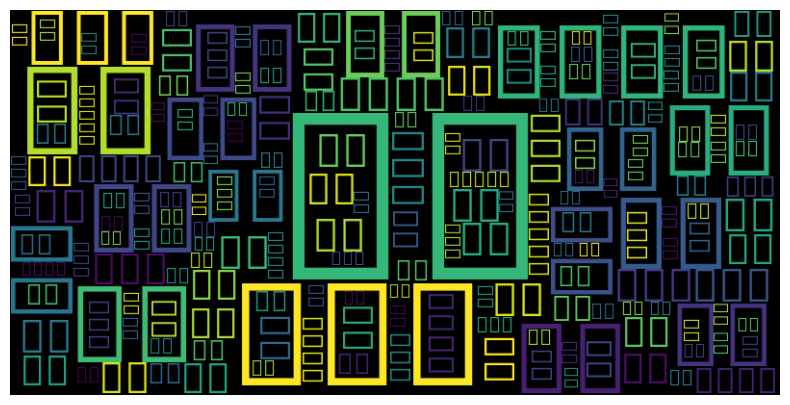

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예시 리스트 (단어들이 들어 있는 리스트)

# 리스트를 문자열로 변환 (워드클라우드를 만들기 위해)
text = ' '.join(nouns)

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(stop_words=None)  # stop_words=None을 사용하여 불용어 제외
X = vectorizer.fit_transform([text])

# 벡터화된 단어와 그 빈도수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
print(word_freq)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
ddff = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
ddff

ddff.to_csv("/Users/leesangwon/Downloads/예시클라우드용_10월_단어빈도.csv", index=False)

In [7]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 예시 데이터 (주식 종목 200개, 이벤트 전후 수익률, 거래량 등 포함)
# 데이터프레임은 각 주식 종목에 대해 "Impact" (이벤트 영향 여부), 수익률, 거래량 등을 포함한다고 가정
data = pd.DataFrame({
    'Stock_Return': np.random.normal(0, 0.02, 200),  # 주식 수익률
    'Market_Return': np.random.normal(0, 0.01, 200),  # 시장 수익률
    'Trading_Volume': np.random.normal(1000000, 50000, 200),  # 거래량
    'Volatility': np.random.normal(0.02, 0.005, 200),  # 변동성
    'Impact': np.random.choice([0, 1], size=200)  # 이벤트 영향 여부 (0: 영향 없음, 1: 영향 있음)
})

# 독립 변수와 종속 변수 설정
X = data[['Stock_Return', 'Market_Return', 'Trading_Volume', 'Volatility']]
X = sm.add_constant(X)  # 상수항 추가 (편향항)
y = data['Impact']

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.669105
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Impact   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                 0.01870
Time:                        15:19:46   Log-Likelihood:                -133.82
converged:                       True   LL-Null:                       -136.37
Covariance Type:            nonrobust   LLR p-value:                    0.2772
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2691      3.064      0.088      0.930      -5.736       6.275
Stock_Return     